**Vamos experimentar agora o algoritmo Naive Bayes?**

In [97]:
!pip -q install yellowbrick

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

In [44]:
X = pd.get_dummies(df.drop('play', axis=1), columns=['outlook', 'temperature', 'humidity', 'windy'])
Y = df['play']

In [45]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.20, random_state = 23)

In [58]:
#naive bayes
modelo = GaussianNB()
modelo.fit(X_treino, y_treino)

GaussianNB()

In [63]:
#random forest
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)

In [83]:
#random forest - grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
best_params = grid_search.best_params_
modelo = grid_search.best_estimator_
print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': None, 'n_estimators': 100}


In [90]:
#random forest - random search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_treino, y_treino)
best_params = random_search.best_params_
modelo = random_search.best_estimator_
print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'n_estimators': 100, 'max_depth': 30}


In [89]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

In [95]:
#teste modelo
previsoes = modelo.predict(X_teste)
previsoes

array(['no', 'no', 'yes'], dtype=object)

In [96]:
#ver se acertou
y_teste

0     no
1     no
2    yes
Name: play, dtype: object

In [86]:
#acurácia
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

1.0

In [67]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[2, 0],
       [0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1.0

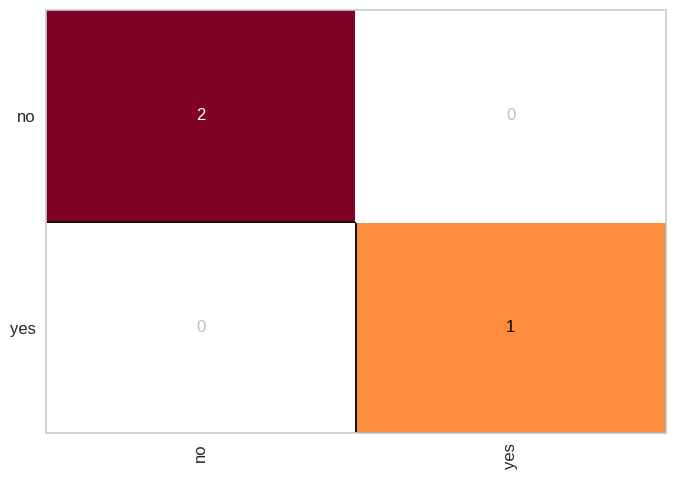

In [93]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [94]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         2
         yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

